In [18]:
import torch
# import torchvision
from PIL import Image
from torchvision import transforms
import urllib
import warnings
from pathlib import Path
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactive = "all"
warnings.filterwarnings("ignore")

# AlexNet
- 5 multi-channel convolutions followed by 3 fully connected layers ~ 60 million parameters

- First network (around 2012) to use a GPU for training to overcome network depth restrictions

In [3]:
model = torch.hub.load('pytorch/vision:v0.10.0', 'alexnet', pretrained=True)
model.eval()

Downloading: "https://github.com/pytorch/vision/archive/v0.10.0.zip" to /home/akinwilson/.cache/torch/hub/v0.10.0.zip
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /home/akinwilson/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:22<00:00, 10.7MB/s] 


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [16]:
!wget https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt -P ./data

--2022-03-30 11:40:12--  https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10472 (10K) [text/plain]
Saving to: ‘./data/imagenet_classes.txt’

imagenet_classes.tx 100%[===================>]  10.23K  --.-KB/s    in 0.001s  

2022-03-30 11:40:12 (10.4 MB/s) - ‘./data/imagenet_classes.txt’ saved [10472/10472]



Samoyed 0.7244769930839539
wallaby 0.13937802612781525
Pomeranian 0.058749970048666
Angora 0.022829847410321236
Arctic fox 0.01245016697794199


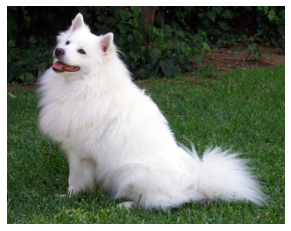

In [22]:
root = Path().cwd()
filename = "dog.jpg"
file_path = root  / "data" / filename 
url, filename = ("https://github.com/pytorch/hub/raw/master/images/dog.jpg", file_path)
urllib.request.urlretrieve(url, filename)
input_image = Image.open(file_path)


preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0)


if torch.cuda.is_available():
    print("Cuda is available")
    input_batch = input_batch.to('cuda')
    model.to('cuda')

with torch.no_grad():
    output = model(input_batch)
probabilities = torch.nn.functional.softmax(output[0], dim=0)


img = plt.imread(file_path)
plt.imshow(img,)
plt.axis("off")

with open("./data/imagenet_classes.txt", "r") as f:
    categories = [s.strip() for s in f.readlines()]
# Show top categories per image
top5_prob, top5_catid = torch.topk(probabilities, 5)
for i in range(top5_prob.size(0)):
    print(categories[top5_catid[i]], top5_prob[i].item())

# MobileNet
 - Designed to be small and low latency.
  
 - Trainable on mobile devices.
 - Standard multi-channel convolutions expensive opertation 
 - Where more than 1 filter used (with multi-channel convolutions), favourable to replace with **depth-wise** followed by **point-wise** convolutions. (layers together are called **depth-wise separable** filters)
 - MobileNet use 3 depth-wise separable layers
 

In [ ]:
model = torch.hub.load('pytorch/vision:v0.10.0', 'mobilenet_v2', pretrained=True)
model.eval()

# VGGNet
- Demonstrated two 3x3 filters are equvialent to a 5x5 receptive field

- Most CNN networks will use a 3x3 kernel because of this reason. Less parameters and less likely to overfit.    

In [ ]:
model = torch.hub.load('pytorch/vision:v0.10.0', 'vgg11', pretrained=True)
model.eval()

# Inception
- Most CNNs stack their layers, Inception  concatenates in parallel filter outputs

- Uses range of kernel sizes to allow learning multiple scales.    

In [ ]:
model = torch.hub.load('pytorch/vision:v0.10.0', 'inception_v3', pretrained=True)
model.eval()

# ResNet
- Uses *skip connections* 

- Surpassed human accuracy on Imagenet dataset
  
- Top 5 errror percentage; precentage of images where correct classification did not make it to the top 5 classes predicted by the network, for humans ~ 5%, for ResNet 3.6%.  First network to beat humans.

In [ ]:
model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet18', pretrained=True)
model.eval()